# CMIP6 AMOC/SST index comparison

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import jCMIP as jc
import glob
import pandas as pd

In [2]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

### Load the SST indecies

In [17]:
fname = '/home/users/train055/project04/data/processed_data/cmip6_ssp126_annual_mean_spg_tos.nc'
sst_dset = xr.open_dataset(fname)

In [18]:
sst_dset

<xarray.Dataset>
Dimensions:                 (year: 86)
Coordinates:
  * year                    (year) int64 2015 2016 2017 2018 ... 2098 2099 2100
Data variables:
    ACCESS-CM2_r1i1p1f1     (year) float32 ...
    CMCC-CM2-SR5_r1i1p1f1   (year) float32 ...
    CanESM5_r1i1p1f1        (year) float32 ...
    EC-Earth3_r1i1p1f1      (year) float32 ...
    IPSL-CM6A-LR_r1i1p1f1   (year) float32 ...
    MIROC6_r1i1p1f1         (year) float32 ...
    MPI-ESM1-2-HR_r1i1p1f1  (year) float32 ...
    MPI-ESM1-2-LR_r1i1p1f1  (year) float32 ...

### Define the AMOC index directory

In [23]:
amoc_dir = '/gws/pw/j05/cop26_hackathons/bristol/project04/results/CMIP6/amoc/ScenarioMIP/ssp126/'

In [20]:
sst_dset.year >= (sst_dset.year[-1] - 10)

<xarray.DataArray 'year' (year: 86)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])
Coordinates:
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100

### Compare the models in the SST index

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/gws/pw/j05/cop26_hac

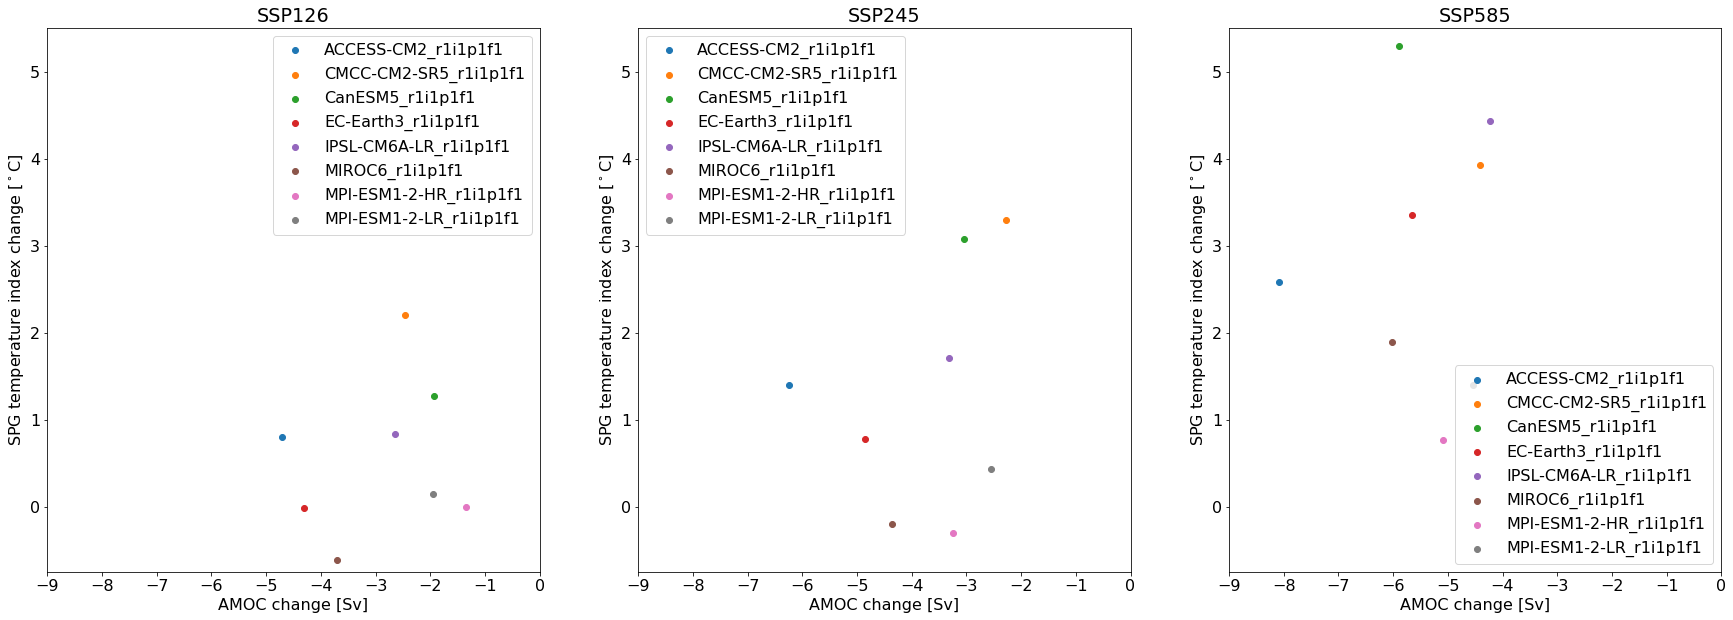

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(30,10))

time_start_idx = sst_dset.year <= (sst_dset.year[0] + 10)
time_end_idx = sst_dset.year >= (sst_dset.year[-1] - 10)

xlims = (-9, 0)
ylims = (-0.75, 5.5)

################################################################################
amoc_dir = '/gws/pw/j05/cop26_hackathons/bristol/project04/results/CMIP6/amoc/ScenarioMIP/ssp126/'
fname = '/home/users/train055/project04/data/processed_data/cmip6_ssp126_annual_mean_spg_tos.nc'
sst_dset = xr.open_dataset(fname)

for ii, model_run in enumerate(sst_dset):
    model, run = model_run.split('_')
    
    amoc_dset = xr.open_dataset((amoc_dir + model + '_ssp126_' + run + '-1ym-amoc-index_26.5.nc'))
    amoc_dset = amoc_dset.isel(datetime=np.arange(0, 86))
    
    sst_diff = sst_dset[model_run].isel(year=time_end_idx.data).mean() - sst_dset[model_run].isel(year=time_start_idx.data).mean().data
    
    amoc_diff = amoc_dset.transport.isel(datetime=time_end_idx.data).mean() - amoc_dset.transport.isel(datetime=time_start_idx.data).mean().data

    ax[0].scatter(amoc_diff, sst_diff, label=model_run)
    
ax[0].legend()
ax[0].set_title('SSP126')
ax[0].set_xlabel('AMOC change [Sv]')
ax[0].set_ylabel('SPG temperature index change [$^\circ$C]')
ax[0].set_xlim(xlims)
ax[0].set_ylim(ylims)

################################################################################
amoc_dir = '/gws/pw/j05/cop26_hackathons/bristol/project04/results/CMIP6/amoc/ScenarioMIP/ssp245/'
fname = '/home/users/train055/project04/data/processed_data/cmip6_ssp245_annual_mean_spg_tos.nc'
sst_dset = xr.open_dataset(fname)

for ii, model_run in enumerate(sst_dset):
    model, run = model_run.split('_')
    
    amoc_dset = xr.open_dataset((amoc_dir + model + '_ssp245_' + run + '-1ym-amoc-index_26.5.nc'))
    amoc_dset = amoc_dset.isel(datetime=np.arange(0, 86))
    
    sst_diff = sst_dset[model_run].isel(year=time_end_idx.data).mean() - sst_dset[model_run].isel(year=time_start_idx.data).mean().data
    
    amoc_diff = amoc_dset.transport.isel(datetime=time_end_idx.data).mean() - amoc_dset.transport.isel(datetime=time_start_idx.data).mean().data

    ax[1].scatter(amoc_diff, sst_diff, label=model_run)
    
ax[1].legend()
ax[1].set_title('SSP245')
ax[1].set_xlabel('AMOC change [Sv]')
ax[1].set_ylabel('SPG temperature index change [$^\circ$C]')
ax[1].set_xlim(xlims)
ax[1].set_ylim(ylims)

################################################################################
amoc_dir = '/gws/pw/j05/cop26_hackathons/bristol/project04/results/CMIP6/amoc/ScenarioMIP/ssp585/'
fname = '/home/users/train055/project04/data/processed_data/cmip6_ssp585_annual_mean_spg_tos.nc'
sst_dset = xr.open_dataset(fname)

for ii, model_run in enumerate(sst_dset):
    model, run = model_run.split('_')
    
    amoc_dset = xr.open_dataset((amoc_dir + model + '_ssp585_' + run + '-1ym-amoc-index_26.5.nc'))
    amoc_dset = amoc_dset.isel(datetime=np.arange(0, 86))
    
    sst_diff = sst_dset[model_run].isel(year=time_end_idx.data).mean() - sst_dset[model_run].isel(year=time_start_idx.data).mean().data
    
    amoc_diff = amoc_dset.transport.isel(datetime=time_end_idx.data).mean() - amoc_dset.transport.isel(datetime=time_start_idx.data).mean().data

    ax[2].scatter(amoc_diff, sst_diff, label=model_run)
    
ax[2].legend()
ax[2].set_title('SSP585')
ax[2].set_xlabel('AMOC change [Sv]')
ax[2].set_ylabel('SPG temperature index change [$^\circ$C]')
ax[2].set_xlim(xlims)
ax[2].set_ylim(ylims)

plt.savefig('/home/users/train055/project04/results/spg_scenarioMIP_SST_AMOC.png', dpi=300, bbox_inches='tight')

In [40]:
amoc_dset.isel(datetime=np.arange(0, 86))

<xarray.Dataset>
Dimensions:    (datetime: 86)
Coordinates:
  * datetime   (datetime) object 2015-12-31 00:00:00 ... 2100-12-31 00:00:00
    latitude   float32 26.5
Data variables:
    transport  (datetime) float32 11.27 11.86 10.33 9.678 ... 8.735 7.512 9.265
Attributes:
    short_desc:    AMOC index (annual mean max streamfunction)
    latitude:      26.5
    model:         IPSL-CM6A-LR
    scenario:      ssp126
    forcing:       r1i1p1f1
    date_created:  04 Jun 2021

In [29]:
amoc_dset.isel(datetime=(amoc_dset.datetime<=np.datetime64('2100-11-30')))

<xarray.Dataset>
Dimensions:    (datetime: 85)
Coordinates:
  * datetime   (datetime) datetime64[ns] 2015-12-31 2016-12-31 ... 2099-12-31
    latitude   float32 26.5
Data variables:
    transport  (datetime) float32 17.93 17.76 18.4 16.36 ... 12.01 11.76 12.16
Attributes:
    short_desc:    AMOC index (annual mean max streamfunction)
    latitude:      26.5
    model:         ACCESS-CM2
    scenario:      ssp126
    forcing:       r1i1p1f1
    date_created:  04 Jun 2021

In [30]:
amoc_dset.transport

<xarray.DataArray 'transport' (datetime: 86)>
array([17.926054, 17.760721, 18.404106, 16.360872, 16.274008, 17.851336,
       17.33715 , 17.32853 , 17.129137, 15.910022, 17.958946, 16.31267 ,
       17.094206, 15.671681, 14.80992 , 14.269287, 14.840129, 16.33784 ,
       14.995728, 14.348992, 12.593114, 12.17308 , 13.384439, 15.333785,
       14.312009, 14.533672, 15.719037, 15.159265, 14.204808, 15.70778 ,
       14.863498, 14.666892, 14.71268 , 15.46334 , 15.212341, 16.087273,
       13.895188, 12.985442, 11.962392, 13.11171 , 14.684049, 12.740559,
       13.403247, 12.179214, 12.350583, 11.657341, 14.246555, 13.980282,
       11.998081, 13.518685, 13.611732, 14.417054, 12.140178, 13.650661,
       14.864445, 11.910024, 13.250499, 12.777703, 11.727302, 10.73949 ,
       11.418991, 11.764535, 12.208102, 11.647015, 11.926784, 12.886546,
       11.835022, 11.734227, 12.922367, 13.114048, 13.219287, 11.863837,
       13.236514, 14.235105, 13.930172, 13.232483, 12.18504 , 13.673069,
       13.027387, 13.129498, 13.161153, 13.563934, 12.012783, 11.756638,
       12.161164, 10.522326], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2015-12-31 2016-12-31 ... 2100-12-31
    latitude  float32 26.5